****
# Données de Panel
## Moyenne du salaire moyen 
### 2001 - 2020
****

Liens vers le site de l'auteur :  [QuantEcon](https://datascience.quantecon.org/applications/index.html "QuantEcon").

In [1]:
import pandas as pd

In [2]:
realwage = pd.read_csv('data/wage.csv', sep="|")

In [3]:
realwage

COUNTRY     Country SERIES                                    Series  \
0        IRL     Ireland    PPP  In 2020 constant prices at 2020 USD PPPs   
1        IRL     Ireland    PPP  In 2020 constant prices at 2020 USD PPPs   
2        IRL     Ireland    PPP  In 2020 constant prices at 2020 USD PPPs   
3        IRL     Ireland    PPP  In 2020 constant prices at 2020 USD PPPs   
4        IRL     Ireland    PPP  In 2020 constant prices at 2020 USD PPPs   
...      ...         ...    ...                                       ...   
2499     CRI  Costa Rica    PPP  In 2020 constant prices at 2020 USD PPPs   
2500     CRI  Costa Rica    PPP  In 2020 constant prices at 2020 USD PPPs   
2501     CRI  Costa Rica    PPP  In 2020 constant prices at 2020 USD PPPs   
2502     CRI  Costa Rica    PPP  In 2020 constant prices at 2020 USD PPPs   
2503     CRI  Costa Rica    PPP  In 2020 constant prices at 2020 USD PPPs   

     PERIOD Pay period  TIME  Time Unit Code       Unit  PowerCode Code  \
0         A     Annual  2001  2001       USD  US Dollar               0   
1         A     Annual  2002  2002       USD  US Dollar               0   
2         A     Annual  2003  2003       USD  US Dollar               0   
3         A     Annual  2004  2004       USD  US Dollar               0   
4         A     Annual  2005  2005       USD  US Dollar               0   
...     ...        ...   ...   ...       ...        ...             ...   
2499      A     Annual  2016  2016       USD  US Dollar               0   
2500      A     Annual  2017  2017       USD  US Dollar               0   
2501      A     Annual  2018  2018       USD  US Dollar               0   
2502      A     Annual  2019  2019       USD  US Dollar               0   
2503      A     Annual  2020  2020       USD  US Dollar               0   

     PowerCode  Reference Period Code  Reference Period     Value  Flag Codes  \
0        Units                    NaN               NaN  15596.64         NaN   
1        Units                    NaN               NaN  15656.66         NaN   
2        Units                    NaN               NaN  15826.46         NaN   
3        Units                    NaN               NaN  16949.05         NaN   
4        Units                    NaN               NaN  17689.83         NaN   
...        ...                    ...               ...       ...         ...   
2499     Units                    NaN               NaN   9867.71         NaN   
2500     Units                    NaN               NaN   9709.84         NaN   
2501     Units                    NaN               NaN   9729.68         NaN   
2502     Units                    NaN               NaN   9785.14         NaN   
2503     Units                    NaN               NaN   9959.91         NaN   

      Flags  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
...     ...  
2499    NaN  
2500    NaN  
2501    NaN  
2502    NaN  
2503    NaN  

[2504 rows x 17 columns]

In [4]:
realwage = realwage.pivot_table(values='Value', index='Time', columns=['Country', 'Series', 'Pay period'])

In [5]:
realwage_f = realwage.xs(('Hourly', 'In 2020 constant prices at 2020 USD exchange rates'),
                         level=('Pay period', 'Series'), axis=1)

In [6]:
realwage_t = realwage_f.transpose().head()

In [7]:
realwage_t

Time        2001   2002   2003   2004   2005   2006   2007   2008   2009  \
Country                                                                    
Australia  11.52  11.63  11.79  11.99  12.09  11.91  12.30  12.08  12.24   
Belgium    10.49  10.63  10.57  10.45  10.37  10.39  10.51  10.47  10.99   
Brazil      0.52   0.54   0.56   0.58   0.61   0.69   0.74   0.77   0.82   
Canada      7.05   6.98   6.88   6.89   6.95   7.11   7.18   7.47   7.91   
Chile       1.18   1.22   1.23   1.27   1.29   1.32   1.35   1.35   1.44   

Time        2010   2011   2012   2013   2014   2015   2016   2017   2018  \
Country                                                                    
Australia  12.18  12.28  12.44  12.48  12.51  12.67  12.82  12.93  13.12   
Belgium    10.75  10.70  10.61  10.81  10.77  10.71  10.61  10.60  10.49   
Brazil      0.87   0.87   0.94   0.97   0.97   0.97   1.00   1.03   1.01   
Canada      8.19   8.22   8.37   8.43   8.48   8.61   8.75   8.90   9.83   
Chile       1.47   1.50   1.54   1.61   1.67   1.71   1.81   1.86   1.90   

Time        2019   2020  
Country                  
Australia  13.33  13.53  
Belgium    10.55  10.57  
Brazil      1.02   1.03  
Canada     10.00  10.18  
Chile       1.98   2.04

In [8]:
worlddata = pd.read_csv('data/world.csv', sep=";")

In [9]:
worlddata = worlddata[['Country (en)', 'Continent']]

In [10]:
worlddata = worlddata.rename(columns={'Country (en)': 'Country'})

In [11]:
worlddata.head()

Country Continent
0    Afghanistan      Asia
1          Egypt    Africa
2  Åland Islands    Europe
3        Albania    Europe
4        Algeria    Africa

In [12]:
merged = pd.merge(realwage_f.transpose(), worlddata,
                  how='left', left_index=True, right_on='Country')

In [13]:
merged.head()

2001   2002   2003   2004   2005   2006   2007   2008   2009   2010  \
17.0   11.52  11.63  11.79  11.99  12.09  11.91  12.30  12.08  12.24  12.18   
23.0   10.49  10.63  10.57  10.45  10.37  10.39  10.51  10.47  10.99  10.75   
32.0    0.52   0.54   0.56   0.58   0.61   0.69   0.74   0.77   0.82   0.87   
100.0   7.05   6.98   6.88   6.89   6.95   7.11   7.18   7.47   7.91   8.19   
38.0    1.18   1.22   1.23   1.27   1.29   1.32   1.35   1.35   1.44   1.47   

       ...   2013   2014   2015   2016   2017   2018   2019   2020    Country  \
17.0   ...  12.48  12.51  12.67  12.82  12.93  13.12  13.33  13.53  Australia   
23.0   ...  10.81  10.77  10.71  10.61  10.60  10.49  10.55  10.57    Belgium   
32.0   ...   0.97   0.97   0.97   1.00   1.03   1.01   1.02   1.03     Brazil   
100.0  ...   8.43   8.48   8.61   8.75   8.90   9.83  10.00  10.18     Canada   
38.0   ...   1.61   1.67   1.71   1.81   1.86   1.90   1.98   2.04      Chile   

           Continent  
17.0       Australia  
23.0          Europe  
32.0   South America  
100.0  North America  
38.0   South America  

[5 rows x 22 columns]

In [14]:
data_nan = merged[merged['Continent'].isnull()]

In [15]:
data_nan

2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  ...  2013  \
NaN  2.50  2.70  2.85  3.06  3.33  3.45  3.77  3.91  4.03  4.03  ...  4.42   
NaN  0.09  0.13  0.14  0.16  0.17  0.24  0.46  0.40  0.68  0.64  ...  0.63   
NaN  0.93  1.04  1.24  1.35  1.44  1.54  1.68  1.76  1.93  2.01  ...  2.14   
NaN  1.03  1.10  1.17  1.53  1.60  1.58  1.57  1.55  1.59  1.60  ...  1.73   

     2014  2015  2016  2017  2018  2019  2020             Country  Continent  
NaN  4.68  4.98  5.33  5.61  6.43  7.11  7.27               Korea        NaN  
NaN  0.63  0.58  0.57  0.67  0.91  0.93  0.96  Russian Federation        NaN  
NaN  2.14  2.14  2.14  2.14  2.14  2.14  2.14     Slovak Republic        NaN  
NaN  1.75  1.83  2.26  2.19  2.15  2.35  2.41             Türkiye        NaN  

[4 rows x 22 columns]

In [16]:
missing_continents = {'Korea': 'Asia',
                      'Russian Federation': 'Europe',
                      'Slovak Republic': 'Europe',
                      'Türkiye': 'Europe'}

In [17]:
merged['Country'].map(missing_continents)

17.0        NaN
23.0        NaN
32.0        NaN
100.0       NaN
38.0        NaN
108.0       NaN
41.0        NaN
225.0       NaN
53.0        NaN
58.0        NaN
45.0        NaN
68.0        NaN
233.0       NaN
86.0        NaN
88.0        NaN
91.0        NaN
NaN        Asia
117.0       NaN
122.0       NaN
123.0       NaN
138.0       NaN
153.0       NaN
151.0       NaN
174.0       NaN
175.0       NaN
NaN      Europe
NaN      Europe
198.0       NaN
200.0       NaN
NaN      Europe
241.0       NaN
240.0       NaN
Name: Country, dtype: object

In [18]:
merged['Continent'] = merged['Continent'].fillna(merged['Country'].map(missing_continents))

In [19]:
check_korea = merged[merged['Country'] == 'Korea']

In [20]:
check_korea

2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  ...  2013  \
NaN   2.5   2.7  2.85  3.06  3.33  3.45  3.77  3.91  4.03  4.03  ...  4.42   

     2014  2015  2016  2017  2018  2019  2020  Country  Continent  
NaN  4.68  4.98  5.33  5.61  6.43  7.11  7.27    Korea       Asia  

[1 rows x 22 columns]

In [21]:
check_australia = merged[merged['Country'] == 'Australia']

In [22]:
check_australia

2001   2002   2003   2004   2005   2006  2007   2008   2009   2010  \
17.0  11.52  11.63  11.79  11.99  12.09  11.91  12.3  12.08  12.24  12.18   

      ...   2013   2014   2015   2016   2017   2018   2019   2020    Country  \
17.0  ...  12.48  12.51  12.67  12.82  12.93  13.12  13.33  13.53  Australia   

      Continent  
17.0  Australia  

[1 rows x 22 columns]

In [23]:
merged = merged.set_index(['Continent', 'Country']).sort_index()

In [24]:
merged

2001   2002   2003   2004   2005   2006  \
Continent       Country                                                        
Asia            Israel               6.55   6.34   6.43   6.45   6.37   6.55   
                Japan                6.35   6.45   6.50   6.51   6.54   6.56   
                Korea                2.50   2.70   2.85   3.06   3.33   3.45   
Australia       Australia           11.52  11.63  11.79  11.99  12.09  11.91   
                New Zealand          7.31   7.37   7.65   7.92   8.13   8.44   
Central America Costa Rica           1.84   1.81   1.83   1.81   1.82   1.84   
Europe          Belgium             10.49  10.63  10.57  10.45  10.37  10.39   
                Czech Republic       1.90   2.11   2.29   2.40   2.52   2.69   
                Estonia              1.23   1.39   1.61   1.77   1.86   1.99   
                France               9.63   9.75   9.91  10.25  10.64  10.91   
                Germany               NaN    NaN    NaN    NaN    NaN    NaN   
                Greece               4.05   4.11   4.18   4.27   4.35   4.47   
                Hungary              1.49   1.77   1.69   1.68   1.74   1.84   
                Ireland              8.53   8.56   8.65   9.27   9.67   9.58   
                Latvia               0.99   1.06   1.20   1.29   1.21   1.27   
                Lithuania            1.32   1.32   1.36   1.49   1.59   1.71   
                Luxembourg          11.96  11.92  12.36  12.35  12.60  12.53   
                Netherlands         10.55  10.66  10.77  10.70  10.52  10.52   
                Poland               1.65   1.61   1.69   1.68   1.70   1.77   
                Portugal             3.45   3.47   3.45   3.45   3.46   3.45   
                Russian Federation   0.09   0.13   0.14   0.16   0.17   0.24   
                Slovak Republic      0.93   1.04   1.24   1.35   1.44   1.54   
                Slovenia             3.69   3.83   3.96   4.09   4.19   4.22   
                Spain                5.41   5.36   5.30   5.44   5.69   5.80   
                Türkiye              1.03   1.10   1.17   1.53   1.60   1.58   
                United Kingdom       7.11   7.61   7.79   8.23   8.61   8.79   
North America   Canada               7.05   6.98   6.88   6.89   6.95   7.11   
                Mexico               0.47   0.47   0.47   0.47   0.47   0.48   
                United States        7.52   7.41   7.24   7.05   6.82   6.61   
South America   Brazil               0.52   0.54   0.56   0.58   0.61   0.69   
                Chile                1.18   1.22   1.23   1.27   1.29   1.32   
                Colombia             0.85   0.86   0.86   0.88   0.89   0.92   

                                     2007   2008   2009   2010   2011   2012  \
Continent       Country                                                        
Asia            Israel               6.85   6.74   6.64   6.46   6.46   6.62   
                Japan                6.63   6.68   6.91   7.08   7.24   7.33   
                Korea                3.77   3.91   4.03   4.03   4.07   4.22   
Australia       Australia           12.30  12.08  12.24  12.18  12.28  12.44   
                New Zealand          9.00   9.29   9.54   9.56   9.37   9.59   
Central America Costa Rica           1.86   1.89   1.92   1.98   2.01   2.04   
Europe          Belgium             10.51  10.47  10.99  10.75  10.70  10.61   
                Czech Republic       2.71   2.55   2.52   2.49   2.44   2.36   
                Estonia              2.26   2.57   2.57   2.50   2.28   2.29   
                France              11.03  11.05  11.24  11.16  11.15  11.29   
                Germany               NaN    NaN    NaN    NaN    NaN    NaN   
                Greece               4.58   4.67   4.88   4.74   4.63   3.70   
                Hungary              1.78   1.77   1.76   1.73   1.76   1.99   
                Ireland             10.13   9.93  10.39  10.49  10.23  10.06   
                Latvia              

In [25]:
merged.columns = pd.to_datetime(merged.columns, format="%Y")

In [26]:
merged.columns = merged.columns.rename('Time')

In [27]:
merged = merged.transpose()

In [28]:
merged.head()

Continent    Asia             Australia             Central America  Europe  \
Country    Israel Japan Korea Australia New Zealand      Costa Rica Belgium   
Time                                                                          
2001-01-01   6.55  6.35  2.50     11.52        7.31            1.84   10.49   
2002-01-01   6.34  6.45  2.70     11.63        7.37            1.81   10.63   
2003-01-01   6.43  6.50  2.85     11.79        7.65            1.83   10.57   
2004-01-01   6.45  6.51  3.06     11.99        7.92            1.81   10.45   
2005-01-01   6.37  6.54  3.33     12.09        8.13            1.82   10.37   

Continent                                 ...                         \
Country    Czech Republic Estonia France  ... Slovenia Spain Türkiye   
Time                                      ...                          
2001-01-01           1.90    1.23   9.63  ...     3.69  5.41    1.03   
2002-01-01           2.11    1.39   9.75  ...     3.83  5.36    1.10   
2003-01-01           2.29    1.61   9.91  ...     3.96  5.30    1.17   
2004-01-01           2.40    1.77  10.25  ...     4.09  5.44    1.53   
2005-01-01           2.52    1.86  10.64  ...     4.19  5.69    1.60   

Continent                 North America                      South America  \
Country    United Kingdom        Canada Mexico United States        Brazil   
Time                                                                         
2001-01-01           7.11          7.05   0.47          7.52          0.52   
2002-01-01           7.61          6.98   0.47          7.41          0.54   
2003-01-01           7.79          6.88   0.47          7.24          0.56   
2004-01-01           8.23          6.89   0.47          7.05          0.58   
2005-01-01           8.61          6.95   0.47          6.82          0.61   

Continent                  
Country    Chile Colombia  
Time                       
2001-01-01  1.18     0.85  
2002-01-01  1.22     0.86  
2003-01-01  1.23     0.86  
2004-01-01  1.27     0.88  
2005-01-01  1.29     0.89  

[5 rows x 32 columns]

In [29]:
minA_wage = merged.mean()

In [30]:
minA_wage

Continent        Country           
Asia             Israel                 6.9635
                 Japan                  7.1650
                 Korea                  4.3875
Australia        Australia             12.3920
                 New Zealand            9.4215
Central America  Costa Rica             2.0035
Europe           Belgium               10.6020
                 Czech Republic         2.6510
                 Estonia                2.4890
                 France                10.9935
                 Germany               10.4100
                 Greece                 4.1510
                 Hungary                2.0450
                 Ireland               10.0220
                 Latvia                 1.9555
                 Lithuania              2.1390
                 Luxembourg            13.0190
                 Netherlands           10.7000
                 Poland                 2.3995
                 Portugal               3.8845
                 Russian

In [31]:
import matplotlib.pyplot as plt

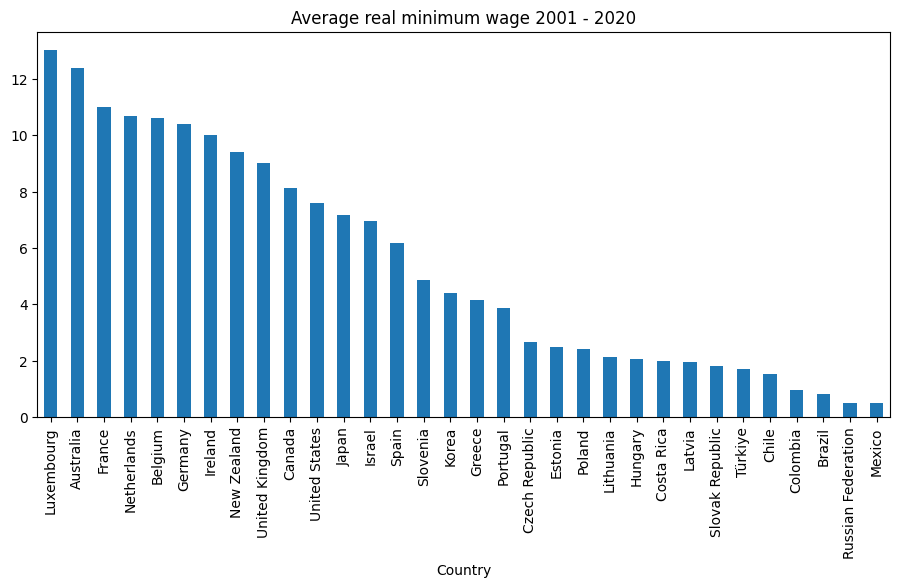

In [32]:
plt.rcParams["figure.figsize"] = (11, 5)

merged.mean().sort_values(ascending=False).plot(kind='bar', title="Average real minimum wage 2001 - 2020")

country_labels = merged.mean().sort_values(ascending=False).index.get_level_values('Country').tolist()
plt.xticks(range(0, len(country_labels)), country_labels)
plt.xlabel('Country')

plt.show()

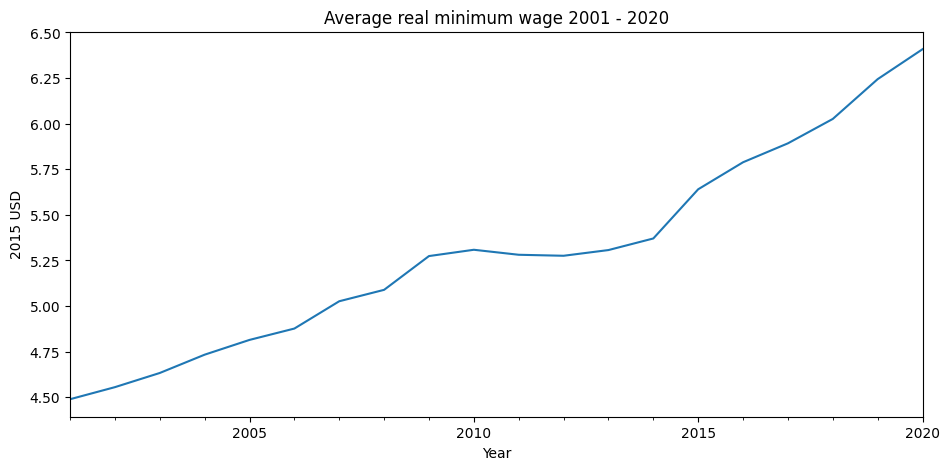

In [33]:
merged.mean(axis=1).plot()
plt.title('Average real minimum wage 2001 - 2020')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

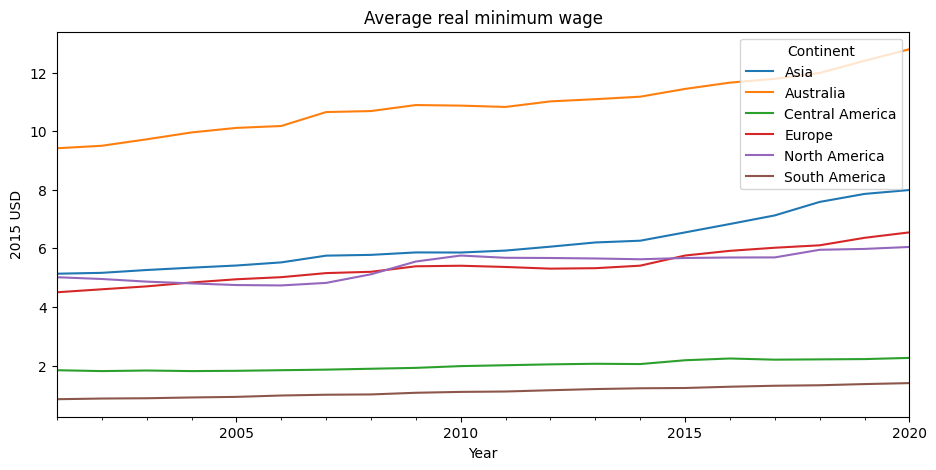

In [34]:
merged.groupby(level='Continent', axis=1).mean().plot()
plt.title('Average real minimum wage')
plt.ylabel('2015 USD')
plt.xlabel('Year')
plt.show()

In [35]:
merged_stat = merged.stack().describe()

In [36]:
merged_stat

Continent       Asia  Australia  Central America      Europe  North America  \
count      60.000000  40.000000         20.00000  386.000000      60.000000   
mean        6.172000  10.906750          2.00350    5.403083       5.400000   
std         1.588261   1.808401          0.16557    3.993009       3.566779   
min         2.500000   7.310000          1.81000    0.090000       0.470000   
25%         5.242500   9.555000          1.84000    2.045000       0.497500   
50%         6.550000  11.575000          1.99500    3.830000       7.145000   
75%         7.247500  12.285000          2.18500   10.017500       8.080000   
max         8.430000  13.530000          2.26000   14.140000      10.180000   

Continent  South America  
count          60.000000  
mean            1.110667  
std             0.364421  
min             0.520000  
25%             0.887500  
50%             1.015000  
75%             1.297500  
max             2.040000

In [37]:
grouped = merged.groupby(level='Continent', axis=1)

In [38]:
grouped.size()

Continent
Asia                3
Australia           2
Central America     1
Europe             20
North America       3
South America       3
dtype: int64

In [39]:
grouped_stat = grouped.describe()

In [40]:
grouped_stat.stack()

Continent      Country        
Asia           Israel    count    20.000000
                         mean      6.963500
                         std       0.678871
                         min       6.340000
                         25%       6.460000
                                    ...    
South America  Colombia  min       0.850000
                         25%       0.912500
                         50%       0.965000
                         75%       1.022500
                         max       1.130000
Length: 256, dtype: float64

In [41]:
grouped_stat

count     mean       std    min      25%  \
Continent       Country                                                        
Asia            Israel               20.0   6.9635  0.678871   6.34   6.4600   
                Japan                20.0   7.1650  0.644634   6.35   6.5550   
                Korea                20.0   4.3875  1.381086   2.50   3.4200   
Australia       Australia            20.0  12.3920  0.545494  11.52  12.0575   
                New Zealand          20.0   9.4215  1.330806   7.31   8.3625   
Central America Costa Rica           20.0   2.0035  0.165570   1.81   1.8400   
Europe          Belgium              20.0  10.6020  0.152819  10.37  10.4900   
                Czech Republic       20.0   2.6510  0.469276   1.90   2.3950   
                Estonia              20.0   2.4890  0.751188   1.23   1.9575   
                France               20.0  10.9935  0.625260   9.63  10.8425   
                Germany               6.0  10.4100  0.177876  10.22  10.2750   
                Greece               20.0   4.1510  0.409337   3.62   3.7275   
                Hungary              20.0   2.0450  0.436933   1.49   1.7550   
                Ireland              20.0  10.0220  0.819606   8.53   9.6475   
                Latvia               20.0   1.9555  0.642458   0.99   1.2850   
                Lithuania            20.0   2.1390  0.761818   1.32   1.6800   
                Luxembourg           20.0  13.0190  0.630062  11.92  12.5750   
                Netherlands          20.0  10.7000  0.131068  10.52  10.5975   
                Poland               20.0   2.3995  0.675445   1.61   1.7525   
                Portugal             20.0   3.8845  0.422829   3.45   3.4675   
                Russian Federation   20.0   0.5100  0.276158   0.09   0.2225   
                Slovak Republic      20.0   1.8130  0.412962   0.93   1.5150   
                Slovenia             20.0   4.8700  0.763710   3.69   4.1875   
                Spain                20.0   6.1605  0.800200   5.30   5.7725   
                Türkiye              20.0   1.7170  0.390979   1.03   1.5650   
                United Kingdom       20.0   9.0350  0.960058   7.11   8.7450   
North America   Canada               20.0   8.1190  1.063380   6.88   7.0950   
                Mexico               20.0   0.4995  0.060825   0.47   0.4700   
                United States        20.0   7.5815  0.547802   6.61   7.2475   
South America   Brazil               20.0   0.8255  0.184462   0.52   0.6700   
                Chile                20.0   1.5370  0.271412   1.18   1.3125   
                Colombia             20.0   0.9695  0.082429   0.85   0.9125   

                                       50%      75%    max  
Continent       Country                                     
Asia            Israel               6.680   7.2575   8.29  
                Japan                7.160   7.5200   8.43  
                Korea                4.050   5.0675   7.27  
Australia       Australia           12.290  12.7075  13.53  
                New Zealand          9.550  10.2800  12.06  
Central America Costa Rica           1.995   2.1850   2.26  
Europe          Belgium             10.585  10.7025  10.99  
                Czech Republic       2.520   2.7325   3.76  
                Estonia              2.425   2.9700   3.97  
                France              11.200  11.4675  11.59  
                Germany             10.380  10.5225  10.67  
                Greece               4.125   4.4975   4.88  
                Hungary              1.810   2.2400   3.00  
                Ireland             10.040  10.5175  11.53  
                Latvia               2.000   2.5850   2.91  
                Lithuania            1.900   2.5525   3.91  
                Luxembourg          13.065  13.5000  14.14  
                Netherlands         10.685  10.8125  10.95  
                Poland               2.300   2.8550   3.83  
                Portugal          

In [42]:
import seaborn as sns

In [43]:
continents = grouped.groups.keys()

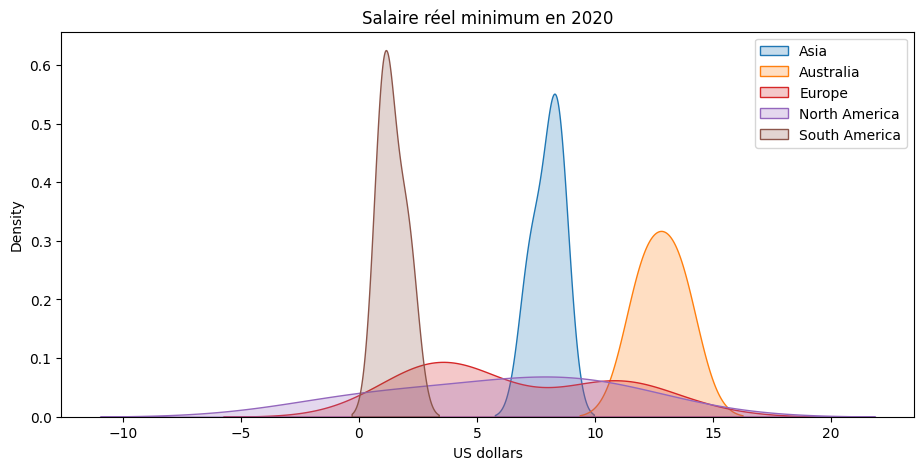

In [44]:
for continent in continents:
    sns.kdeplot(grouped.get_group(continent).loc['2020'].unstack(), label=continent, shade=True, warn_singular=False)

plt.title('Salaire réel minimum en 2020')
plt.xlabel('US dollars')
plt.legend()
plt.show()

****
# Fin de l'étude
****